In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fn_individualCases = 'processed_individual_cases_Sep20th2020.csv'
fn_location = 'processed_location_Sep20th2020.csv'

icData = pd.read_csv(fn_individualCases)
locData = pd.read_csv(fn_location)

# 1.1 Exploratory Data Analysis

In [3]:
print("shape: ",icData['outcome'].value_counts())
print("outcome sum: ",icData['outcome'].value_counts().sum())
print("data shape: ", icData.shape)

shape:  nonhospitalized    250000
hospitalized       203228
recovered           98137
deceased             5999
Name: outcome, dtype: int64
outcome sum:  557364
data shape:  (557364, 10)


In [4]:
print('individual Cases Data: ')
ic_shape = icData.shape
ic_col_val =  icData.columns.values
icData_missing = icData.isnull().sum()
print('shape: \n', ic_shape)
print('\ncolumn value: \n', ic_col_val)
print('\nmissing value:\n',icData_missing)
print('\ndata type:\n', icData.dtypes)

print("\n")
print(icData['country'].value_counts())
print(icData['outcome'].value_counts())

individual Cases Data: 
shape: 
 (557364, 10)

column value: 
 ['age' 'sex' 'province' 'country' 'latitude' 'longitude'
 'date_confirmation' 'additional_information' 'source' 'outcome']

missing value:
 age                       296874
sex                       293734
province                    6568
country                       24
latitude                       2
longitude                      2
date_confirmation            462
additional_information    522969
source                    209191
outcome                        0
dtype: int64

data type:
 age                        object
sex                        object
province                   object
country                    object
latitude                  float64
longitude                 float64
date_confirmation          object
additional_information     object
source                     object
outcome                    object
dtype: object


India                               301144
Peru                                 95540

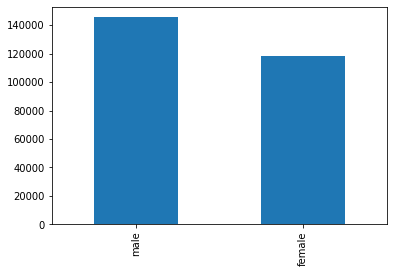

In [5]:
icData.sex.value_counts().plot(kind='bar');

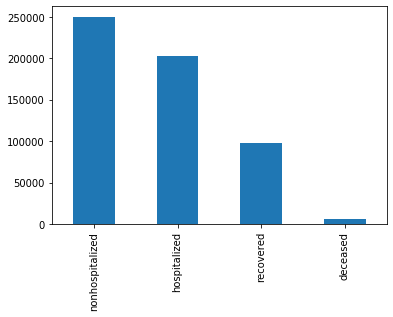

In [6]:
icData.outcome.value_counts().plot(kind='bar');

(-54.808029999999974, 70.0718)

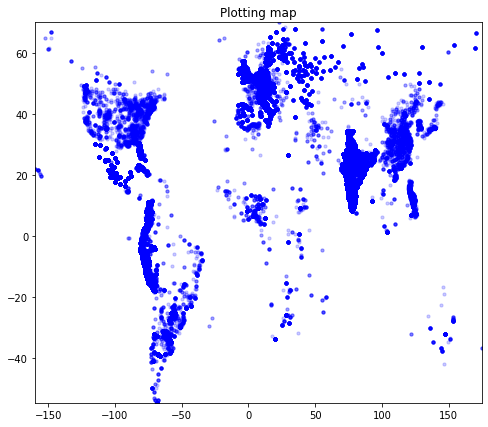

In [7]:
BBox = (icData.longitude.min(),   icData.longitude.max(),      
         icData.latitude.min(), icData.latitude.max())
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(icData.longitude, icData.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

In [8]:
print("Country_Region sum: ",locData['Country_Region'].value_counts().sum())
print("Last_Update sum: ",locData['Last_Update'].value_counts().sum())
print("Confirmed sum: ",locData['Confirmed'].value_counts().sum())
print("Deaths sum: ",locData['Deaths'].value_counts().sum())
print("Recovered sum: ",locData['Recovered'].value_counts().sum())
print("Combined_Key sum: ",locData['Combined_Key'].value_counts().sum())
print("with missing value 'Long_': ",locData['Long_'].value_counts().sum())
print("data shape: ", locData.shape)


Country_Region sum:  3954
Last_Update sum:  3954
Confirmed sum:  3954
Deaths sum:  3954
Recovered sum:  3954
Combined_Key sum:  3954
with missing value 'Long_':  3874
data shape:  (3954, 12)


In [9]:
print('location Data: ')
locData_shape = locData.shape
locData_col_val =  locData.columns.values
locData_missing = locData.isnull().sum()
print('shape: \n', locData_shape)
print('\ncolumn value: \n', locData_col_val)
print('\nmissing value:\n',locData_missing)
print('\ndata type:\n', locData.dtypes)

location Data: 
shape: 
 (3954, 12)

column value: 
 ['Province_State' 'Country_Region' 'Last_Update' 'Lat' 'Long_' 'Confirmed'
 'Deaths' 'Recovered' 'Active' 'Combined_Key' 'Incidence_Rate'
 'Case-Fatality_Ratio']

missing value:
 Province_State         168
Country_Region           0
Last_Update              0
Lat                     80
Long_                   80
Confirmed                0
Deaths                   0
Recovered                0
Active                   2
Combined_Key             0
Incidence_Rate          80
Case-Fatality_Ratio     48
dtype: int64

data type:
 Province_State          object
Country_Region          object
Last_Update             object
Lat                    float64
Long_                  float64
Confirmed                int64
Deaths                   int64
Recovered                int64
Active                 float64
Combined_Key            object
Incidence_Rate         float64
Case-Fatality_Ratio    float64
dtype: object


(-52.368, 71.7069)

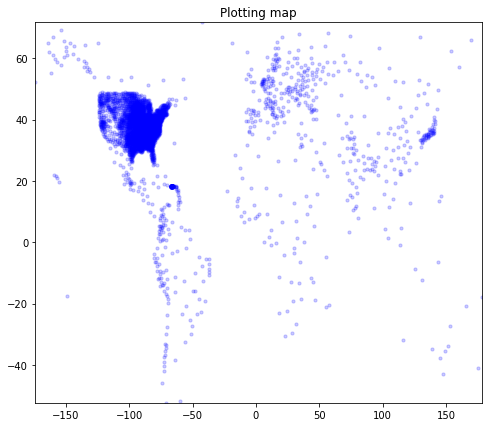

In [10]:
BBox_loc = (locData.Long_.min(),   locData.Long_.max(),      
         locData.Lat.min(), locData.Lat.max())
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(locData.Long_, locData.Lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting map')
ax.set_xlim(BBox_loc[0],BBox_loc[1])
ax.set_ylim(BBox_loc[2],BBox_loc[3])

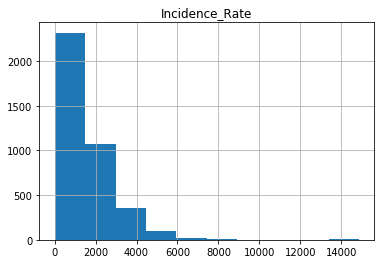

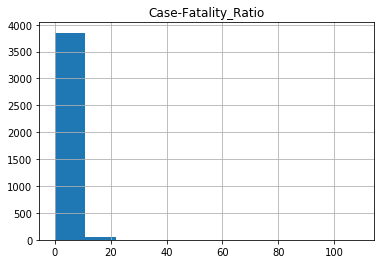

In [11]:
locData.hist(column = 'Incidence_Rate');
locData.hist(column = 'Case-Fatality_Ratio');

# 1.2 Data cleaning and Imputing missing values

In [12]:
def DealAge(age):
    if isinstance(age,float):
        return age
    if isinstance(age,str):
        try:
            return float(age)
        except:
            pass
        if age.find('-')>0:
            li = age.split("-")

            try:
                return int((float(li[0])+float(li[1]))/2.0)
            except:
                pass
        if age.find("+"):
            try:
                a = float(age.strip("+"))
                return int((a+(int(a)/10+1)*10)/2)
            except:
                pass
        if age.find("-"):
            try:
                a = float(age.strip("-"))
                return int((a+(int(a)/10)*10)/2)
            except:
                pass

    return 0
icData["age"] = icData["age"].map(DealAge)
values1 = {
    'age':int(icData["age"].mean()),
    'sex':'unknown',
    "province":"unknown",
    "country":"unknown",
    "latitude":0,
    "longitude":0,
    "date_confirmation":"unknown",
    "additional_information":"unknown",
    "date_confirmation":"unknown",
    "source":"unknown"}
icData = icData.fillna(value = values1)
print(icData.isnull().sum())
print("data shape: ", icData.shape)

age                       0
sex                       0
province                  0
country                   0
latitude                  0
longitude                 0
date_confirmation         0
additional_information    0
source                    0
outcome                   0
dtype: int64
data shape:  (557364, 10)


In [13]:
values2 = {
    'Province_State':'unknown',
    "Lat":0,
    "Long_":0,
    "Active":0,
    "Incidence_Rate":0,
    "Case-Fatality_Ratio": 0}
locData = locData.fillna(value = values2)
print(locData.isnull().sum())
print("data shape: ", locData.shape)

Province_State         0
Country_Region         0
Last_Update            0
Lat                    0
Long_                  0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
Combined_Key           0
Incidence_Rate         0
Case-Fatality_Ratio    0
dtype: int64
data shape:  (3954, 12)


# 1.3 Dealing with outliers

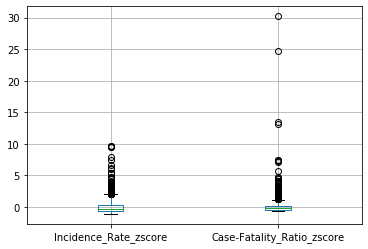

In [14]:
cols = ['Incidence_Rate','Case-Fatality_Ratio']
for col in cols:
    col_zscore = col+'_zscore'
    locData[col_zscore] = (locData[col]-locData[col].mean())/locData[col].std(ddof=0)
locData.head(20)

locData.boxplot(column=['Incidence_Rate_zscore','Case-Fatality_Ratio_zscore'])

In [15]:
case_outlier = locData['Case-Fatality_Ratio_zscore']>3
incidence_outlier = locData['Incidence_Rate_zscore']>3
print('Incidence_Rate outlier by country: \n',
      locData[incidence_outlier]['Country_Region'].value_counts())
print('\nCase-Fatality_Ratio outlier by country: \n', 
      locData[case_outlier]['Country_Region'].value_counts())

Incidence_Rate outlier by country: 
 US        53
Brazil     2
Peru       1
Name: Country_Region, dtype: int64

Case-Fatality_Ratio outlier by country: 
 US            16
Mexico        10
Italy          2
Yemen          1
MS Zaandam     1
Name: Country_Region, dtype: int64


In [16]:
locData = locData.drop(columns=['Case-Fatality_Ratio_zscore','Incidence_Rate_zscore'])

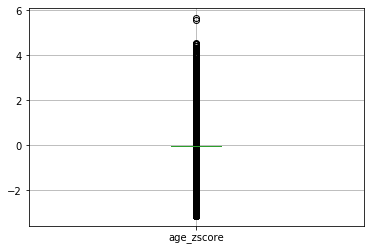

In [17]:
# icData.dtypes
cols = ['age']
for col in cols:
    col_zscore = col+'_zscore'
    icData[col_zscore] = (icData[col]-icData[col].mean())/icData[col].std(ddof=0)
# icData.head(20)
icData.boxplot(column=['age_zscore'])

In [18]:
upper_case_outlier = icData['age_zscore']>3
lower_case_outlier = icData['age_zscore']<(-3)

print('\nage outlier: \n', 
      icData[upper_case_outlier]['age'].value_counts(),
     icData[lower_case_outlier]['age'].value_counts())

icData = icData.drop(columns=['age_zscore'])


age outlier: 
 85.0     7746
95.0      877
86.0      364
88.0      341
87.0      312
89.0      289
90.0      276
91.0      172
92.0      170
93.0      137
94.0      110
96.0       58
97.0       41
98.0       36
99.0       22
100.0      13
102.0       7
105.0       6
104.0       4
101.0       3
103.0       3
120.0       1
106.0       1
121.0       1
Name: age, dtype: int64 2.000000    1715
0.000000    1006
1.000000     713
0.100000      13
1.500000       8
0.500000       5
0.250000       4
0.200000       3
0.700000       3
0.300000       3
0.900000       2
0.583330       1
1.750000       1
0.750000       1
0.600000       1
0.666667       1
0.400000       1
Name: age, dtype: int64


# 1.4 Transformation


In [19]:
us_selected = locData['Country_Region'] == 'US'
grouped = locData[us_selected].groupby('Province_State')[['Confirmed','Deaths','Recovered','Active']].sum()
grouped['Province_Case-Fatality_Ratio'] = grouped['Deaths']/grouped['Confirmed']*100
grouped

,Confirmed,Deaths,Recovered,Active,Province_Case-Fatality_Ratio
Province_State,,,,,
Alabama,144164,2437,0,141727.0,1.690436
Alaska,6729,45,0,6684.0,0.668747
Arizona,212942,5451,0,207491.0,2.559852
Arkansas,75160,1181,0,73979.0,1.571315
California,783313,15018,0,768295.0,1.917241
Colorado,64336,2013,0,62323.0,3.128886
Connecticut,55527,4492,0,51035.0,8.089758
Delaware,19449,621,0,18828.0,3.192966
Diamond Princess,49,0,0,49.0,0.000000


# 1.5 Joining the cases and location dataset

In [20]:
print(locData.isnull().sum())
print(icData.isnull().sum())

Province_State         0
Country_Region         0
Last_Update            0
Lat                    0
Long_                  0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
Combined_Key           0
Incidence_Rate         0
Case-Fatality_Ratio    0
dtype: int64
age                       0
sex                       0
province                  0
country                   0
latitude                  0
longitude                 0
date_confirmation         0
additional_information    0
source                    0
outcome                   0
dtype: int64


In [21]:
dropped_location = locData.dropna()
dropped_cases = icData.dropna();
print(dropped_location.shape)
print(dropped_cases.shape)
    

(3954, 12)
(557364, 10)


In [22]:
#merge based on country,province dropped_cases
country_merge = dropped_cases.merge(dropped_location, how='left', left_on=['country'], right_on=['Country_Region'])

country_merge = dropped_cases.merge(dropped_location, how='left', left_on=['country','province'], right_on=['Country_Region',"Province_State"])

country_merge.shape

(557364, 22)

In [23]:
values2 = {
    'Last_Update': 'unknown',
    'Province_State':'unknown',
    "Lat":0,
    "Long_":0,
    'Confirmed':0,
    'Deaths':0,
    'Recovered':0,
    "Active":0,
    "Incidence_Rate":0,
    'Combined_Key':'unknown',
    'Incidence_Rate':0,
    "Case-Fatality_Ratio": 0}
country_merge = country_merge.fillna(value = values2)
print(country_merge.isnull().sum())
print("data shape: ", country_merge.shape)

age                            0
sex                            0
province                       0
country                        0
latitude                       0
longitude                      0
date_confirmation              0
additional_information         0
source                         0
outcome                        0
Province_State                 0
Country_Region            100605
Last_Update                    0
Lat                            0
Long_                          0
Confirmed                      0
Deaths                         0
Recovered                      0
Active                         0
Combined_Key                   0
Incidence_Rate                 0
Case-Fatality_Ratio            0
dtype: int64
data shape:  (557364, 22)


In [24]:
country_merge.to_csv("newfile.csv",index = False,header=True)
newdata = pd.read_csv("newfile.csv")
newdata.shape

(557364, 22)

In [25]:

newdata.head(1)

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome,...,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,43.0,unknown,Gujarat,India,23.02776,72.60027,15.04.2020,unknown,https://gujcovid19.gujarat.gov.in/uploads/pres...,hospitalized,...,2020-09-20 04:22:56,22.694884,71.590923,120336.0,3286.0,100974.0,16076.0,"Gujarat, India",188.400627,2.730687


from numpy import nan
def JoinDataSet():
    tmp = icData
    tmp2 = locData
    n = len(tmp2)
    
    dropped_location = tmp2.dropna()
    dropped_cases = tmp.dropna();
    
    #merge based on country,province dropped_cases
    country_merge = dropped_cases.merge(dropped_location, how='left', left_on=['country','province'], right_on=['Country_Region',"Province_State"])
    
    #merge based on longitude and latitude
    coord_merge = pd.merge(dropped_cases,dropped_location,left_on = ['latitude','longitude'],right_on=['Lat','Long_'])
    
    
    
    country_merge.to_csv("newfile.csv",index = False,header=True)
    return 
    
JoinDataSet();

In [26]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import pylab as pl
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


keep_col = ['age','sex','province','country','outcome']
training_col= ['age','sex','province','country']
cvt_col = ['sex','province','country','outcome']

labelencoder = LabelEncoder()

newfile = pd.read_csv("newfile.csv");
newfile.head(10)

newfile = newfile[keep_col]

newfile = newfile.replace(['unknown'],'0')
# newfile.drop_duplicates(keep = False,inplace = True)

newfile.shape


for col in cvt_col:
    
    newfile[col] = labelencoder.fit_transform(newfile[col])


newfile.head(20)
target = newfile['outcome']
trains = newfile[training_col]

X_train,X_test,y_train,y_test = train_test_split(trains,target,test_size = 0.2,random_state=11)
X_train.head(10)
y_train.head(10)

def SVM():
    clf = svm.SVC(kernel="linear",gamma='auto')
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(y_pred)
    ans = []
    for val in y_test:
        ans.append(val)
    print(ans)
    print("Accuracy",metrics.accuracy_score(y_test,y_pred))
    
    matrix  = confusion_matrix( ans, y_pred)
    
    print(matrix)
#     plt.show();


def decisiontree():
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train);
    y_pred = clf.predict(X_test)
    print(y_pred)
    print("Accuracy",metrics.accuracy_score(y_test,y_pred))
    #balanced accuracy
    print("balanced accuracy",metrics.balanced_accuracy_score(y_test,y_pred));
    print("precision score",metrics.precision_score(y_test,y_pred,average="macro"))
    print(metrics.confusion_matrix(y_test,y_pred))
    
    return


def logistic():
    clf = LogisticRegression(random_state = 0,solver = 'lbfgs',multi_class = 'auto' ).fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("accuracy",metrics.accuracy_score(y_test,y_pred));
    print(y_pred)
    print("Accuracy",metrics.accuracy_score(y_test,y_pred))
    #balanced accuracy
    print("balanced accuracy",metrics.balanced_accuracy_score(y_test,y_pred));
    print("precision score",metrics.precision_score(y_test,y_pred,average="macro"))
    print(metrics.confusion_matrix(y_test,y_pred))
    return 

logistic()


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.699407031299059
[2 2 1 ... 2 1 1]
Accuracy 0.699407031299059
balanced accuracy 0.42989271228027315
precision score 0.35740488987785596
[[    2   925   301     0]
 [  173 34617  5921     0]
 [  732  5881 43346     0]
 [   14 17561  2000     0]]


In [27]:
clf = LogisticRegression(random_state = 0,solver = 'lbfgs',multi_class = 'auto' ).fit(X_train,y_train)
y_pred = clf.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [28]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred))
#this is the accuracy score 

Accuracy 0.699407031299059


In [29]:
#this is the balanced accuracy that calculates the average of sensitivity and specificity of the result
print("balanced accuracy",metrics.balanced_accuracy_score(y_test,y_pred));

balanced accuracy 0.42989271228027315


In [30]:
#calculates the percentage of true positive using tp/(tp+fp), tp = true positive and fp = false positive
print("precision score",metrics.precision_score(y_test,y_pred,average="macro"))

precision score 0.35740488987785596


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:

print(metrics.confusion_matrix(y_test,y_pred))

[[    2   925   301     0]
 [  173 34617  5921     0]
 [  732  5881 43346     0]
 [   14 17561  2000     0]]


In [32]:
#check for overfitting: 
check_pred = clf.predict(X_train)
print("Accuracy of x_train",metrics.accuracy_score(check_pred,y_train))
#the model didn't overfit because the accuracy of the X_train is not higher than X_test, therefore it doesn't recognize the pattern of the X_train

Accuracy of x_train 0.6988277404118944


In [33]:
print("balanced accuracy",metrics.balanced_accuracy_score(y_train,check_pred));

balanced accuracy 0.43019643353343257


In [34]:
print("precision score",metrics.precision_score(y_train,check_pred,average="macro"))

precision score 0.3577518194126047


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
